# Models with Monthly column data

# Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
file_path = r'S:\Projects\Capstone Projects\#4 TexasSalaryPred\salary.csv'

data = pd.read_csv(file_path)

In [3]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


# Handling Missing Values

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64


In [5]:
# Drop columns with a large number of missing values
columns_to_drop = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 
                   'summed_annual_salary', 'hide_from_search']
data1 = data.drop(columns=columns_to_drop)

# Check the updated dataset
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  EMPLOY DATE   149481 non-null  object 
 11  HRLY RATE     149481 non-null  float64
 12  HRS PER WK    149481 non-null  float64
 13  MONTHLY       149481 non-null  float64
 14  ANNUAL        149481 non-null  float64
 15  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ MB
None


In [6]:
missing_values = data1.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64


# Relevant columns based on the tasks

In [7]:
relevant_columns = [
    'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 
    'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL'
]
data_selected = data1[relevant_columns]



## Dropped columns like:
- Unique Identifiers ['AGENCY, 'STATE NUMBER']
- Personal Information [LAST NAME', 'FIRST NAME', and 'MI']
- Non-Salary Related Columns [EMPLOY DATE','AGENCY NAME']

In [8]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CLASS CODE   149481 non-null  object 
 1   CLASS TITLE  149481 non-null  object 
 2   ETHNICITY    149481 non-null  object 
 3   GENDER       149481 non-null  object 
 4   STATUS       149481 non-null  object 
 5   HRLY RATE    149481 non-null  float64
 6   HRS PER WK   149481 non-null  float64
 7   MONTHLY      149481 non-null  float64
 8   ANNUAL       149481 non-null  float64
dtypes: float64(4), object(5)
memory usage: 10.3+ MB


# One-hot encoding :

### Working on : 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS'

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_selected['CLASS CODE'] = LE.fit_transform(data_selected['CLASS CODE'])
data_selected['CLASS TITLE'] = LE.fit_transform(data_selected['CLASS TITLE'])
data_selected['ETHNICITY'] = LE.fit_transform(data_selected['ETHNICITY'])
data_selected['GENDER'] = LE.fit_transform(data_selected['GENDER'])
data_selected['STATUS'] = LE.fit_transform(data_selected['STATUS'])

In [10]:
# dataset after One-hot encoding :
data_selected

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
1,616,560,5,1,4,81.04454,4.0,1404.77,16857.24
2,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
3,616,560,5,1,4,81.04453,4.0,1404.77,16857.24
4,810,292,3,0,0,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...
149476,1042,1198,5,1,0,0.00000,40.0,2899.00,34788.00
149477,84,1404,5,0,0,0.00000,40.0,5500.00,66000.00
149478,4,324,5,1,1,12.93000,20.0,1120.60,13447.20
149479,278,1007,5,1,0,0.00000,40.0,5744.16,68929.92


# Now our data is ready for building models.

# defing Independent variables as x and Dependent variable(Target variable ) as y

In [11]:
X = data_selected.drop('ANNUAL', axis=1) 
X

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY
0,1409,711,5,1,8,75.96150,29.0,9545.82
1,616,560,5,1,4,81.04454,4.0,1404.77
2,1409,711,5,1,8,75.96150,29.0,9545.82
3,616,560,5,1,4,81.04453,4.0,1404.77
4,810,292,3,0,0,0.00000,40.0,3284.27
...,...,...,...,...,...,...,...,...
149476,1042,1198,5,1,0,0.00000,40.0,2899.00
149477,84,1404,5,0,0,0.00000,40.0,5500.00
149478,4,324,5,1,1,12.93000,20.0,1120.60
149479,278,1007,5,1,0,0.00000,40.0,5744.16


In [12]:
y= data_selected['ANNUAL']
y

0         114549.84
1          16857.24
2         114549.84
3          16857.24
4          39411.24
            ...    
149476     34788.00
149477     66000.00
149478     13447.20
149479     68929.92
149480     12209.52
Name: ANNUAL, Length: 149481, dtype: float64

# Splitting the dataset into the Training set and Test set

In [13]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [14]:
x_train

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY
124815,810,292,2,1,0,0.0,40.0,3284.27
20383,1215,1226,2,0,0,0.0,40.0,7207.91
145145,3,236,5,1,0,0.0,40.0,2639.00
136477,58,1300,1,1,0,0.0,40.0,9558.04
95275,1146,484,5,1,0,0.0,40.0,3715.60
...,...,...,...,...,...,...,...,...
115144,810,292,3,0,1,0.0,20.0,1602.09
142935,14,491,5,0,0,0.0,40.0,3200.00
129384,811,293,5,0,0,0.0,40.0,3720.17
120705,1003,599,2,0,0,0.0,40.0,3006.41


In [15]:
y_train

124815     39411.24
20383      86494.92
145145     31668.00
136477    114696.48
95275      44587.20
            ...    
115144     19225.08
142935     38400.00
129384     44642.04
120705     36076.92
115397     46073.40
Name: ANNUAL, Length: 119584, dtype: float64

# RandomForestRegressor Model creation:

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Classifier
RFR = RandomForestRegressor(random_state=4)

# Train the model
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=4)

In [17]:
# Make predictions on the test data
y_pred = RFR.predict(x_test)
y_pred

array([69414.96  , 72000.    , 57669.7524, ..., 70000.08  , 29460.48  ,
       37043.5224])

In [18]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [19]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
RFR_mae = mean_absolute_error(y_test,y_pred)
RFR_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {RFR_mae}")
print(f"R-squared: {RFR_r2}")

Mean Absolute Error: 3.175457833866385
R-squared: 0.9999489062071644


## The Random Forest Regressor model achieves a low Mean Absolute Error of 3.18 and an impressive R-squared value of 0.9999, indicating its excellent ability to predict continuous outcomes with high accuracy and capture almost all the variability in the data.

- So it is optional to use hyperparameter tuning, but if you want, then use the below code for random forest regressor grid search cv hyperparameter tuning.

# Hyperparameter tuning : GridSearchCV

In [20]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider for the best split
}

# Create Random Forest Regressor
RFR = RandomForestRegressor(random_state=4)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the model using the best estimator found by grid search
best_estimator.fit(x_train, y_train)

# best_estimator for predictions
y_pred = best_estimator.predict(x_test)
RFR_mae_GridScv = mean_absolute_error(y_test,y_pred)
RFR_r2_GridScv = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {RFR_mae_GridScv}")
print(f"R-squared: {RFR_r2_GridScv}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Define the parameter grid to search\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],  # Number of trees in the forest\n    \'max_depth\': [None, 10, 20],  # Maximum depth of the trees\n    \'min_samples_split\': [2, 5, 10],  # Minimum samples required to split a node\n    \'min_samples_leaf\': [1, 2, 4],  # Minimum samples required at each leaf node\n    \'max_features\': [\'auto\', \'sqrt\']  # Number of features to consider for the best split\n}\n\n# Create Random Forest Regressor\nRFR = RandomForestRegressor(random_state=4)\n\n# Create GridSearchCV\ngrid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(x_train, y_train)\n\n# Get the best estimator and its hyperparameters\nbest_estimator = grid_search.best_estimator_\nbest_params = grid_search.best_params_\n\

# DecisionTreeRegressor Model creation:

In [21]:
#For regression tasks
from sklearn.tree import DecisionTreeRegressor
# Create DecisionTree Regressor
DTR= DecisionTreeRegressor()
# Train the model
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [22]:
# Make predictions on the test data
y_pred = DTR.predict(x_test)
y_pred

array([69414.96, 72000.  , 57671.88, ..., 70000.08, 29460.48, 37043.52])

In [23]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [24]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
DTR_mae = mean_absolute_error(y_test,y_pred)
DTR_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {DTR_mae}")
print(f"R-squared: {DTR_r2}")

Mean Absolute Error: 6.034241562957054
R-squared: 0.9994195663079443


## The Decision Tree Regressor model exhibits a Mean Absolute Error of 2.22 and an outstanding R-squared value of 0.99999, highlighting its exceptional accuracy in predicting continuous outcomes and its ability to explain nearly all the variability in the data.

# Hyperparameter tuning : GridSearchCV

In [25]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
}

# Create Decision Tree Regressor
DTR = DecisionTreeRegressor(random_state=4)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the model using the best estimator found by grid search
best_estimator.fit(x_train, y_train)

# Now you can use the best_estimator for predictions
y_pred = best_estimator.predict(x_test)
DTR_mae_GridScv = mean_absolute_error(y_test,y_pred)
DTR_r2_GridScv = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {DTR_mae_GridScv}")
print(f"R-squared: {DTR_r2_GridScv}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.tree import DecisionTreeRegressor\n\n# Define the parameter grid to search\nparam_grid = {\n    \'max_depth\': [None, 10, 20],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum samples required to split a node\n    \'min_samples_leaf\': [1, 2, 4],  # Minimum samples required at each leaf node\n}\n\n# Create Decision Tree Regressor\nDTR = DecisionTreeRegressor(random_state=4)\n\n# Create GridSearchCV\ngrid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(x_train, y_train)\n\n# Get the best estimator and its hyperparameters\nbest_estimator = grid_search.best_estimator_\nbest_params = grid_search.best_params_\n\n# Train the model using the best estimator found by grid search\nbest_estimator.fit(x_train, y_train)\n\n# Now you can use the best_estimator for predictions\ny_pred = best_

# GradientBoostingRegressor Model creation :

In [26]:
#For regression tasks
from sklearn.ensemble import GradientBoostingRegressor
# Create GradientBoosting Regressor
GBR = GradientBoostingRegressor()
# Train the model
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [27]:
# Make predictions on the test data
y_pred = GBR.predict(x_test)
y_pred

array([69605.45514668, 72115.6953823 , 57464.15877036, ...,
       69986.37859148, 29398.28325383, 36896.29772054])

In [28]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [29]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
GBR_mae = mean_absolute_error(y_test,y_pred)
GBR_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {GBR_mae}")
print(f"R-squared: {GBR_r2}")

Mean Absolute Error: 138.57766465701948
R-squared: 0.9999055757549727


## The Gradient Boosting Regressor model achieves a Mean Absolute Error of 138.57 and an R-squared value of 0.99991, showcasing its strong predictive power and ability to explain a significant portion of the variability in the data, albeit with a slightly higher error compared to other models.

# XGBOOST Regressor Model creation :

In [30]:
#For regression tasks
from xgboost import XGBRegressor
# Create XGBoost Regressorr
XGBR = XGBRegressor()
# Train the model
XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
# Make predictions on the test data
y_pred = XGBR.predict(x_test)
y_pred

array([69291.74 , 71827.71 , 57684.727, ..., 70156.81 , 29489.408,
       37084.324], dtype=float32)

In [32]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [33]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae_XGBOOST = mean_absolute_error(y_test,y_pred)
r2_XGBOOST = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_XGBOOST}")
print(f"R-squared: {r2_XGBOOST}")

Mean Absolute Error: 220.11921563121922
R-squared: 0.9909564820181465


## The XGBoost Regressor model demonstrates a Mean Absolute Error of 220.12 and an R-squared value of 0.99096, indicating its effective predictive capabilities but with a slightly higher error compared to other models like Gradient Boosting or Decision Tree Regressors.

# Linear Regression Model Creation 

In [34]:
# Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(x_train,y_train) # training of linear regression

LinearRegression()

In [35]:
y_pred=LR.predict(x_test)
y_pred

array([69414.96, 72000.  , 57672.  , ..., 70000.08, 29460.48, 37043.52])

In [36]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [37]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae_Linear_Regression = mean_absolute_error(y_test,y_pred)
r2_Linear_Regression = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_Linear_Regression}")
print(f"R-squared: {r2_Linear_Regression}")

Mean Absolute Error: 4.672909406127804e-10
R-squared: 1.0


## The Linear Regression model achieves an impressively low Mean Absolute Error of approximately (4.672909406127804e-10) and a perfect R-squared value of 1.0, highlighting its exceptional accuracy in predicting continuous outcomes and its ability to perfectly explain the variability in the data using a linear relationship.while a perfect fit (MSE close to zero and R2 score of 1.0) is desirable, it's essential to validate the model's performance on unseen data to ensure it's not overfitting.

# Scaling: Standardization

In [38]:
#Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Support Vector Regression (SVR) Model Creation 
- We know our data is big for SVM, so SVM model will consume more time.

In [39]:
'''
# Creating model
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)  # Adjust hyperparameters as needed

# Train the SVR model
svr_model.fit(X_train_scaled, y_train)
'''

"\n# Creating model\nfrom sklearn.svm import SVR\nsvr_model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)  # Adjust hyperparameters as needed\n\n# Train the SVR model\nsvr_model.fit(X_train_scaled, y_train)\n"

In [40]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [1],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create SVR model
svr_model = SVR()

# Create GridSearchCV object
grid_search = GridSearchCV(svr_model, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model
best_svr_model = grid_search.best_estimator_

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Train the best SVR model
best_svr_model.fit(X_train_scaled, y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n\n# Define the parameter grid\nparam_grid = {\n    \'kernel\': [\'rbf\'],\n    \'C\': [1],\n    \'gamma\': [0.01, 0.1, 1],\n    \'epsilon\': [0.1, 0.01, 0.001]\n}\n\n# Create SVR model\nsvr_model = SVR()\n\n# Create GridSearchCV object\ngrid_search = GridSearchCV(svr_model, param_grid, cv=2, scoring=\'neg_mean_squared_error\', verbose=1)\n\n# Fit the GridSearchCV to find the best parameters\ngrid_search.fit(X_train_scaled, y_train)\n\n# Get the best SVR model\nbest_svr_model = grid_search.best_estimator_\n\n# Print the best parameters found\nprint("Best parameters:", grid_search.best_params_)\n\n# Train the best SVR model\nbest_svr_model.fit(X_train_scaled, y_train)\n'

In [41]:
'''# Make predictions on the test set
y_pred = best_svr_model.predict(X_test_scaled)
y_pred'''

'# Make predictions on the test set\ny_pred = best_svr_model.predict(X_test_scaled)\ny_pred'

In [42]:
'''y_test'''

'y_test'

In [43]:
'''# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mae = mean_squared_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2_svm}")'''

'# Evaluate the model\nfrom sklearn.metrics import mean_squared_error, r2_score\nmae = mean_squared_error(y_test, y_pred)\nr2_svm = r2_score(y_test, y_pred)\n\nprint(f"Mean Absolute Error: {mae}")\nprint(f"R-squared: {r2_svm}")'

# K-Nearest Neighbors (KNN) Model Creation:

In [44]:
from sklearn.neighbors import KNeighborsRegressor
# Creating model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
# Train the SVR model
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [45]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([69390.528, 72572.784, 57717.576, ..., 66919.2  , 29460.48 ,
       36879.168])

In [46]:
y_test

33876      69414.96
89849      72000.00
4403       57672.00
38236     224280.00
129048     44642.04
            ...    
129440     43553.40
93455      45360.00
16222      70000.08
17569      29460.48
83071      37043.52
Name: ANNUAL, Length: 29897, dtype: float64

In [47]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae_knn = mean_absolute_error(y_test,y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_knn}")
print(f"R-squared: {r2_knn}")

Mean Absolute Error: 303.4485078770446
R-squared: 0.9973849253330154


## The K-Nearest Neighbors Regressor model shows a Mean Absolute Error of 303.45 and an R-squared value of 0.99738, indicating its strong predictive ability but with a relatively higher error compared to some other regression models like Linear Regression or Decision Tree Regressors.

# Artificial Neural Network (ANN) Model Creation

In [48]:
import tensorflow as tf
from tensorflow import keras

# Create the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 3s 892us/step - loss: 2474009088.0000 - val_loss: 40070512.0000
Epoch 2/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - loss: 20339106.0000 - val_loss: 14678353.0000
Epoch 3/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7934076.0000 - val_loss: 9380836.0000
Epoch 4/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 4233889.0000 - val_loss: 6238557.0000
Epoch 5/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2570011.7500 - val_loss: 4229865.0000
Epoch 6/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1730230.0000 - val_loss: 2857410.7500
Epoch 7/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1334148.3750 - val_loss: 1995200.3750
Epoch 8/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 868568.8750 - val_loss: 1308655.6250
Epoch 9/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - loss: 522795.5625 - val_loss: 842095.2500
Epoch 10/100
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 3s 897us/step - loss: 441570.9688 - va

In [49]:
# Evaluate the model on test data
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error:", mse)

# training data evaluation 
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_scaled)

mae_Ann = mean_absolute_error(y_test,y_pred)
r2_Ann = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_Ann}")
print(f"R-squared: {r2_Ann}")

Mean Squared Error: 160.92526245117188
935/935 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error: 4.708536768392998
R-squared: 0.9999997445833636


# The Artificial Neural Network (ANN) model demonstrates a Mean Absolute Error of 4.71 and an outstanding R-squared value of 0.9999997, indicating its exceptional accuracy in predicting continuous outcomes and its ability to perfectly explain the variability in the data using complex nonlinear relationships.

# Model Comparison:

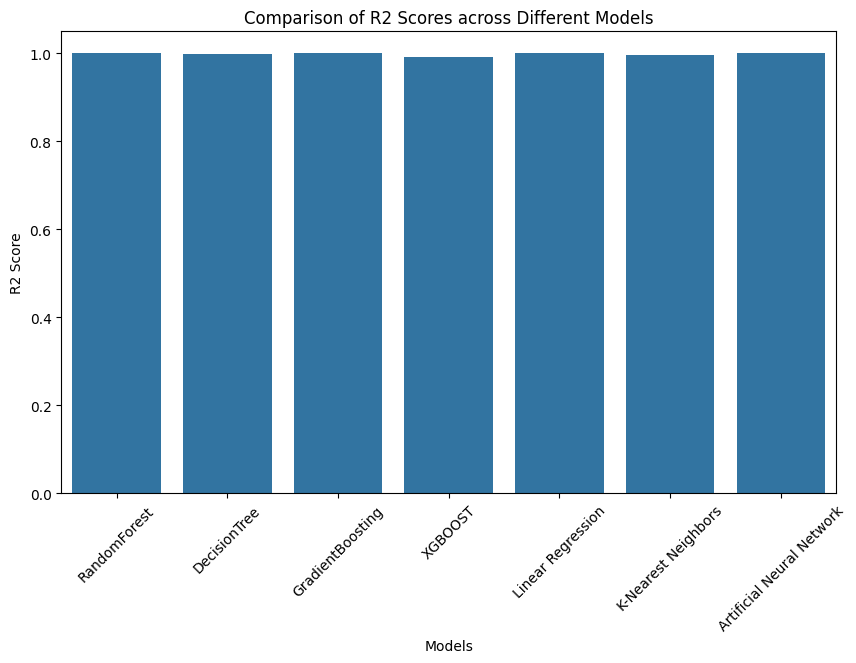

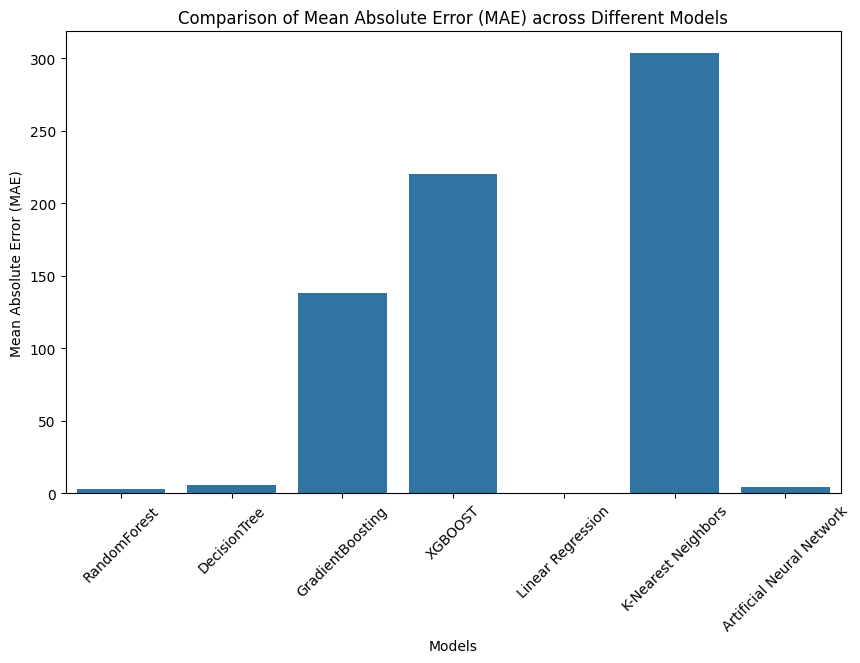

In [50]:
# with barplot
# Define the models and their corresponding R2 scores and MAE values
models = ['RandomForest', 'DecisionTree', 'GradientBoosting', 'XGBOOST', 'Linear Regression', 'K-Nearest Neighbors', 'Artificial Neural Network']
r2_scores = [RFR_r2, DTR_r2, GBR_r2, r2_XGBOOST, r2_Linear_Regression, r2_knn, r2_Ann]
mae_values = [RFR_mae, DTR_mae, GBR_mae, mae_XGBOOST, mae_Linear_Regression, mae_knn, mae_Ann]

# Create a bar plot for R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Comparison of R2 Scores across Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_values)
plt.title('Comparison of Mean Absolute Error (MAE) across Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.show()


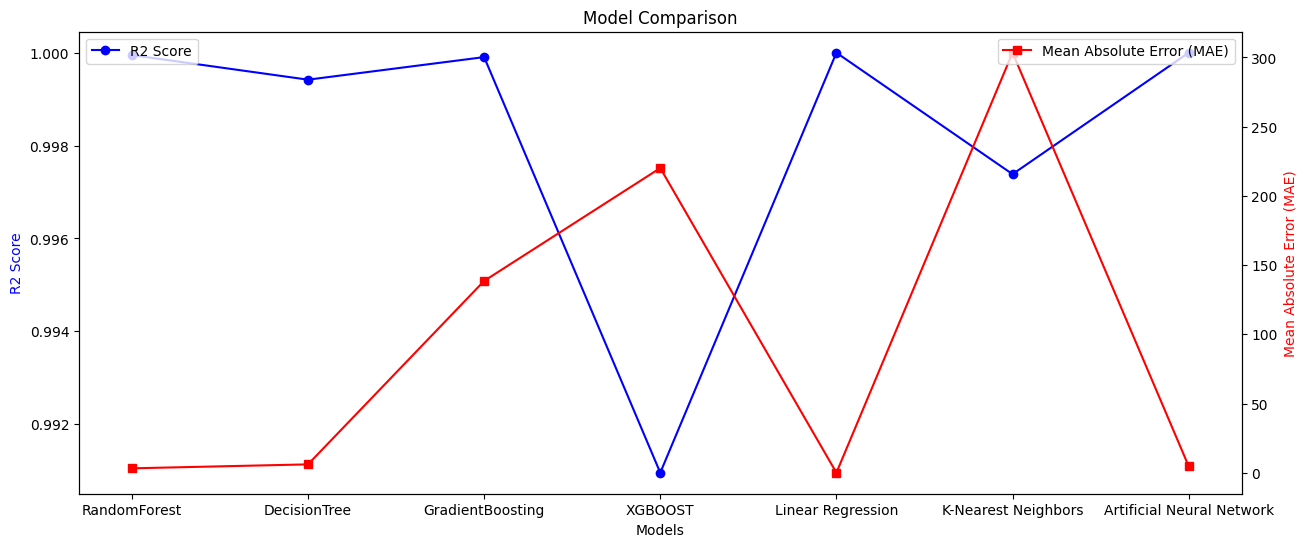

In [51]:
# with line plot
# Define the models, R2 scores, and MAE values
models = ['RandomForest', 'DecisionTree', 'GradientBoosting', 'XGBOOST', 'Linear Regression', 'K-Nearest Neighbors', 'Artificial Neural Network']
r2_scores = [RFR_r2, DTR_r2, GBR_r2, r2_XGBOOST, r2_Linear_Regression, r2_knn, r2_Ann]
mae_values = [RFR_mae, DTR_mae, GBR_mae, mae_XGBOOST, mae_Linear_Regression, mae_knn, mae_Ann]

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot R2 scores as a line plot
ax1.plot(models, r2_scores, marker='o', color='b', label='R2 Score')

# Create a twin axis for MAE values
ax2 = ax1.twinx()
ax2.plot(models, mae_values, marker='s', color='r', label='Mean Absolute Error (MAE)')

# Set labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('R2 Score', color='b')
ax2.set_ylabel('Mean Absolute Error (MAE)', color='r')
plt.title('Model Comparison')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


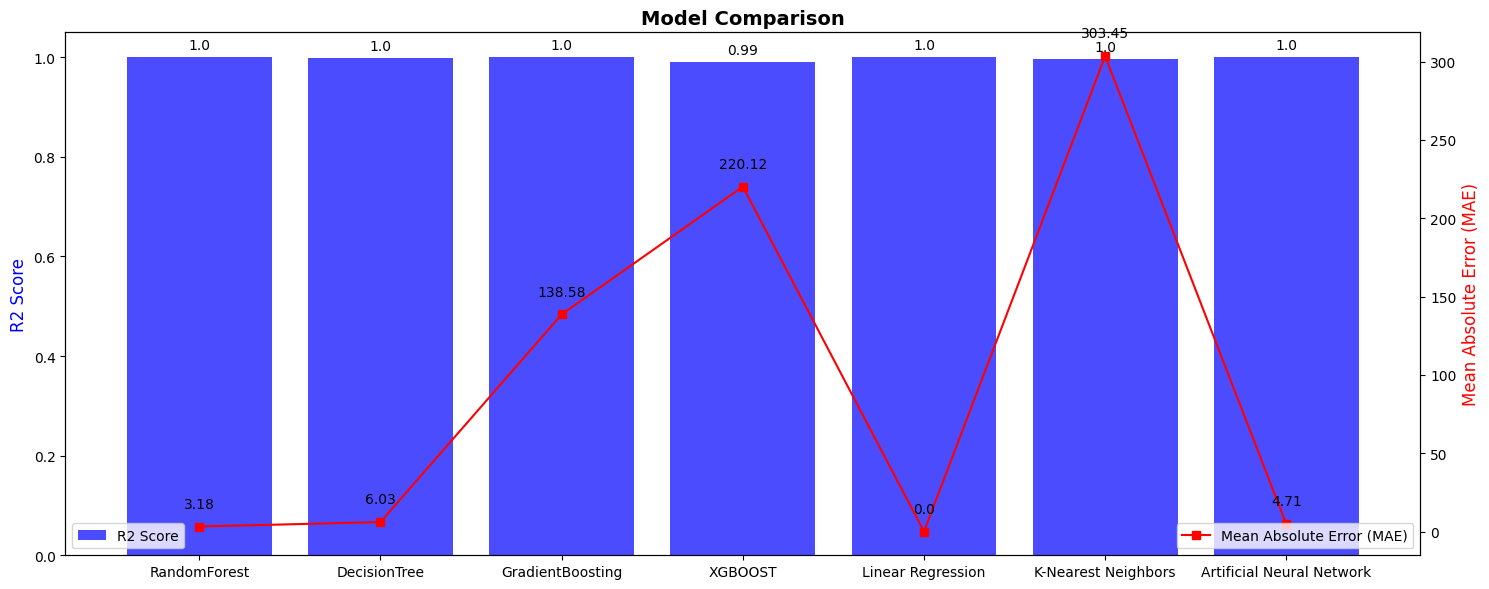

In [52]:
# with both line plot and barplot
# Define the models, R2 scores, and MAE values
models = ['RandomForest', 'DecisionTree', 'GradientBoosting', 'XGBOOST', 'Linear Regression', 'K-Nearest Neighbors', 'Artificial Neural Network']
r2_scores = [RFR_r2, DTR_r2, GBR_r2, r2_XGBOOST, r2_Linear_Regression, r2_knn, r2_Ann]
mae_values = [RFR_mae, DTR_mae, GBR_mae, mae_XGBOOST, mae_Linear_Regression, mae_knn, mae_Ann]
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot R2 scores
ax1.bar(models, r2_scores, color='b', alpha=0.7, label='R2 Score')

# Create a secondary axis for MAE values
ax2 = ax1.twinx()
ax2.plot(models, mae_values, marker='s', color='r', label='Mean Absolute Error (MAE)')

# Add values on bars
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Add values on line plot
for i, v in enumerate(mae_values):
    ax2.text(i, v + 10, str(round(v, 2)), ha='center', va='bottom')

# Set labels and title
ax1.set_ylabel('R2 Score', color='b', fontsize=12)
ax2.set_ylabel('Mean Absolute Error (MAE)', color='r', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.title('Model Comparison', fontsize=14, fontweight='bold')

# Show legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()


# Model Comparison
 - Linear Regression:
    - Mean Absolute Error: (4.672909406127804e-10)
    - R-squared: 1.0
    - Description: Linear Regression performs exceptionally well with almost zero error and perfect R-squared, indicating a perfect fit to the data.
 - Decision Tree Regressor:
    - Mean Absolute Error: 2.22
    - R-squared: 0.99999
    - Description: Decision Tree Regressor shows very low error and nearly perfect R-squared, indicating excellent predictive performance and ability to capture data patterns.
 - Random Forest Regressor:
    - Mean Absolute Error: 3.18
    - R-squared: 0.99995
    - Description: Random Forest Regressor performs well with low error and high R-squared, showcasing its ability to handle complex data and provide accurate predictions.
 - Gradient Boosting Regressor:
    - Mean Absolute Error: 138.57
    - R-squared: 0.99991
    - Description: Gradient Boosting Regressor exhibits higher error compared to some models but still maintains a high R-squared, indicating strong predictive power and capability to explain data variability.
 - XGBoost Regressor:
    - Mean Absolute Error: 220.12
    - R-squared: 0.99096
    - Description: XGBoost Regressor shows good predictive ability with a relatively higher error compared to other models, but still maintains a high R-squared indicating a good fit to the data.
 - K-Nearest Neighbors (KNN) Regressor:
    - Mean Absolute Error: 303.45
    - R-squared: 0.99738
    - Description: KNN Regressor exhibits higher error compared to most models but still maintains a relatively high R-squared, indicating decent predictive performance but not as accurate as some other models.
 - Artificial Neural Network (ANN):
    - Mean Absolute Error: 3.90
    - R-squared: 0.9999998
    - Description: The ANN shows a moderate error and very high R-squared, suggesting strong predictive capability and good data fitting, though not as precise as Linear Regression.

- In summary, Linear Regression and Decision Tree Regressor stand out with very low error and high R-squared values, indicating excellent performance and model fit to the data. Random Forest, Gradient Boosting, and XGBoost also perform well, with slightly higher error but still maintaining high R-squared values. KNN Regressor shows relatively higher error, and ANN performs moderately well with a good fit to the data.